In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_curve,auc
from sklearn import metrics
from sklearn import tree
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the Dataset, 
data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
# Make sure the data loaded properly. 
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data Cleaning.

In [4]:
# Check the number of ros and columns of the data.
data.shape

(4269, 13)

Education level has a possibility of adding bias to the model. This needs to be graphed to determine its distribution.

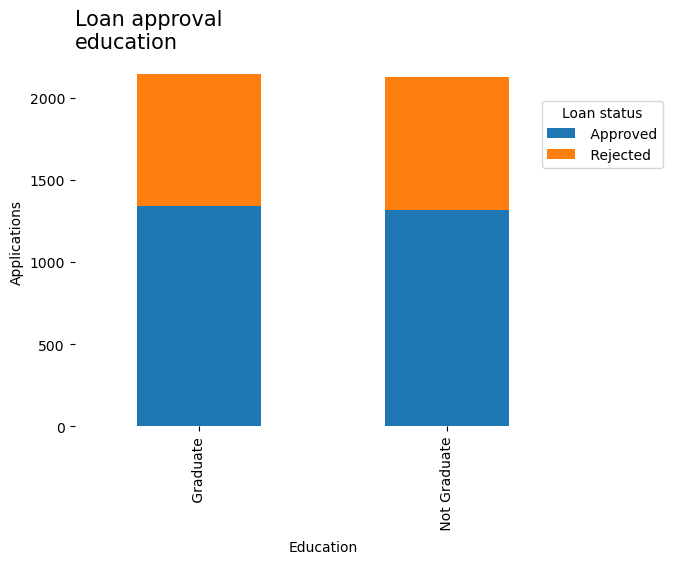

In [5]:
# Split the data for education with its approval status.
education_splt = pd.crosstab(data[' education'], data[' loan_status'])

# Create a bar plot for loan approvals and denials based on education.
education_splt.plot(kind='bar', stacked=True)
# Add a titles, labels, and a legend.
plt.title('Loan approval \neducation', fontsize = 15, loc='left')
plt.xlabel('Education')
plt.ylabel('Applications')
plt.legend(title='Loan status', loc="upper right", bbox_to_anchor=(1.2, 0.9))
plt.box(False)
plt.show()

In [6]:
# Drop education and id from the data set.
data = data.drop(columns=["loan_id", ' education'])

In [7]:
# Check the names of columns.
data.columns

Index([' no_of_dependents', ' self_employed', ' income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value',
       ' loan_status'],
      dtype='object')

In [8]:
# Create a tuple to fix each column by removing the extra space.
new_col_names = [(' no_of_dependents', 'no_of_dependents'), (' self_employed', 'self_employed'), 
                 (' income_annum', 'income_annum'), (' loan_term', 'loan_term'), 
                 (' cibil_score', 'cibil_score'), (' residential_assets_value', 'residential_assets_value'), 
                 (' commercial_assets_value', 'commercial_assets_value'), 
                 (' luxury_assets_value', 'luxury_assets_value'), (' bank_asset_value', 'bank_asset_value'), 
                 (' loan_status', 'loan_status'), (' loan_amount', 'loan_amount')]

# Loop the data to remove the extra space in the data.
for k, i in new_col_names:
    data.rename(columns={k: i}, inplace=True)

print(data.columns)

Index(['no_of_dependents', 'self_employed', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [9]:
# Obtain the number of loan approvals and rejections in the data.
data['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [10]:
# Check for NA values.
data.isna().sum().sum()

0

In [11]:
# Use decribe to help identify if any column has a mixed data type.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [12]:
# Convert the categorical columns to dummies of the interger type.
data = pd.get_dummies(data, drop_first=True, dtype=int)
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,self_employed_ Yes,loan_status_ Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1


In [13]:
# Make sure all data types are integer.
data.dtypes

no_of_dependents            int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
self_employed_ Yes          int64
loan_status_ Rejected       int64
dtype: object

In [14]:
# Remove the extra space in the dummy column for the loan status.
data.rename(columns={'loan_status_ Rejected': 'loan_status_Rejected'}, inplace=True)

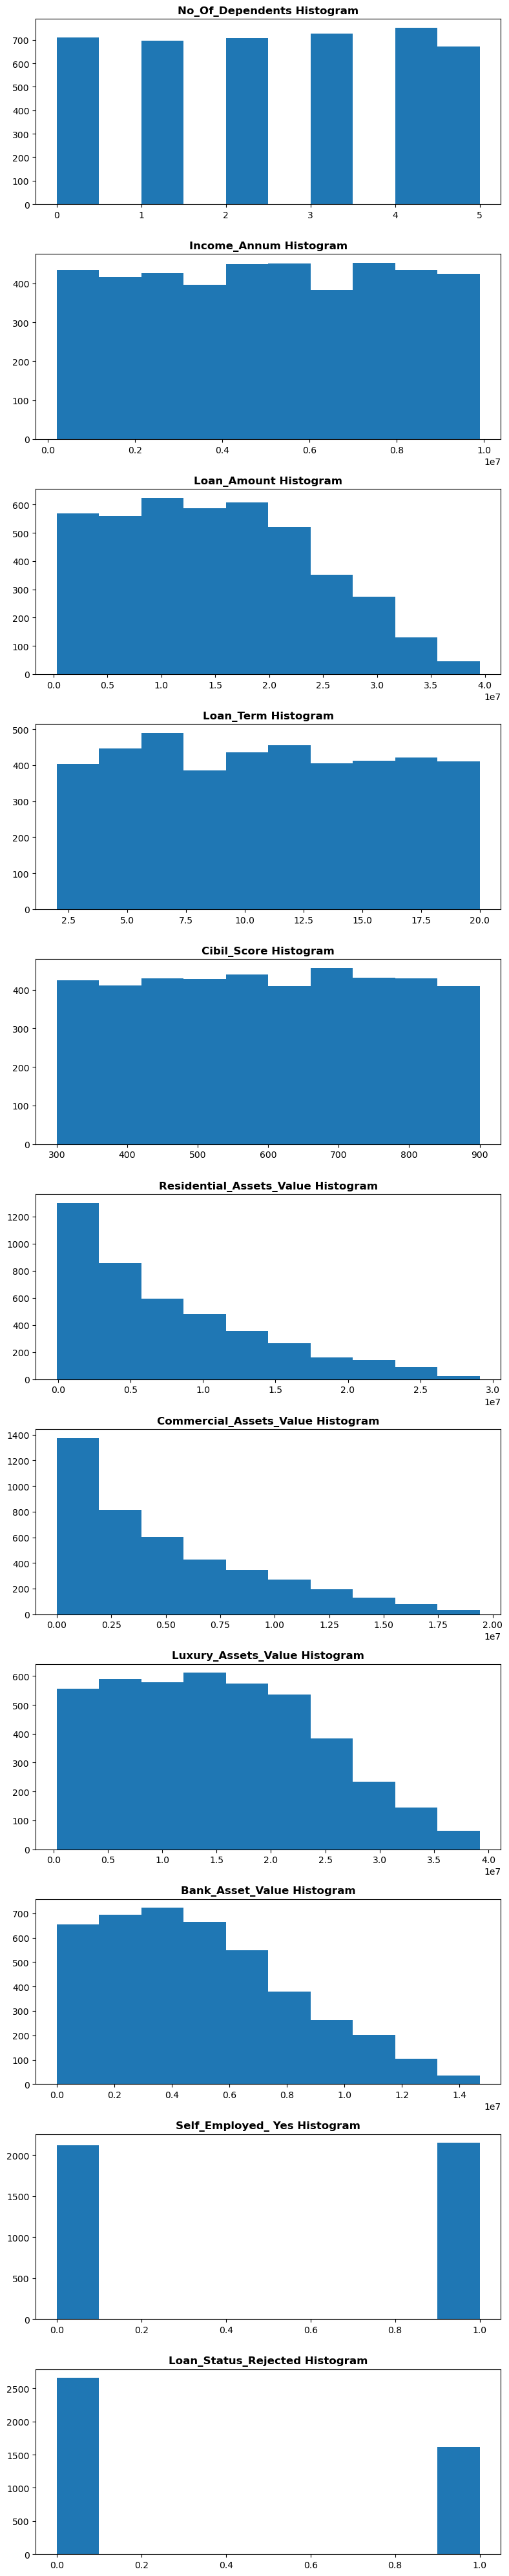

In [15]:
# Using fig and axs set up the dimenstions of the subplots.
fig, axs = plt.subplots(len(data.columns), 1, figsize = (8, 40))
# Loop through the data to plot a histogram.
# Enumerate keeps track of the i value.
for i, ax in enumerate(axs):
    ax.hist(data.iloc[:,i])
    ax.set_title(data.columns[i].title() + ' Histogram', fontsize = 12,fontweight= "bold")
# Tight layout prints the plots close together.
plt.tight_layout()
# Use show to display the plots.
plt.show()

In [16]:
# Check if there are any 0s in the data (needed for a log transformation).
(data == 0).any(axis=0)

no_of_dependents             True
income_annum                False
loan_amount                 False
loan_term                   False
cibil_score                 False
residential_assets_value     True
commercial_assets_value      True
luxury_assets_value         False
bank_asset_value             True
self_employed_ Yes           True
loan_status_Rejected         True
dtype: bool

In [17]:
# Apply the sqrt function to residential assets.
data['residential_assets_value'] = np.sqrt(data['residential_assets_value'])

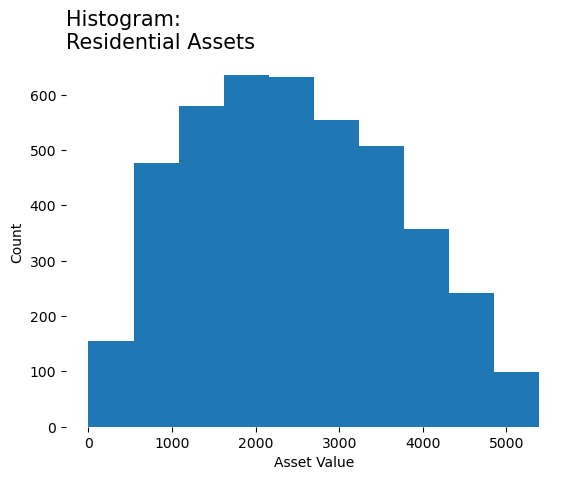

In [18]:
# Plot the histogram of residential assets to make sure the data appears normally distributed.
plt.hist(data['residential_assets_value'])
plt.title("Histogram: \nResidential Assets", fontsize = 15, loc="left")
plt.xlabel("Asset Value")
plt.ylabel("Count")
plt.box(False)
plt.show()

In [19]:
# Apply the sqrt function to commercial assets.
data['commercial_assets_value'] = np.sqrt(data['commercial_assets_value'])

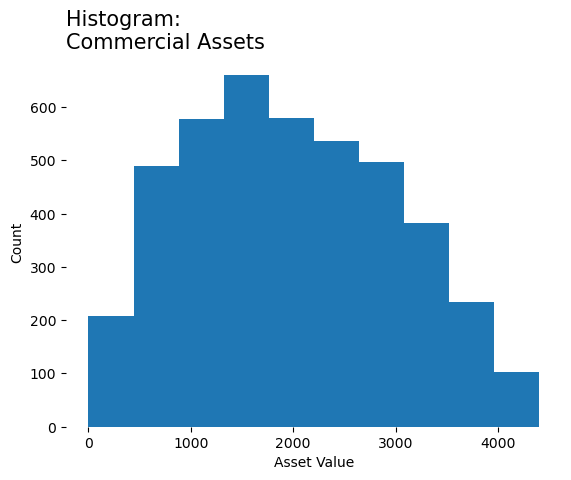

In [20]:
# Plot the histogram of commercial assets to make sure the data appears normally distributed.
plt.hist(data['commercial_assets_value'])
plt.title("Histogram: \nCommercial Assets", fontsize = 15, loc="left")
plt.xlabel("Asset Value")
plt.ylabel("Count")
plt.box(False)
plt.show()

In [21]:
# Apply the sqrt function to bank assets.
data['bank_asset_value'] = np.sqrt(data['bank_asset_value'])

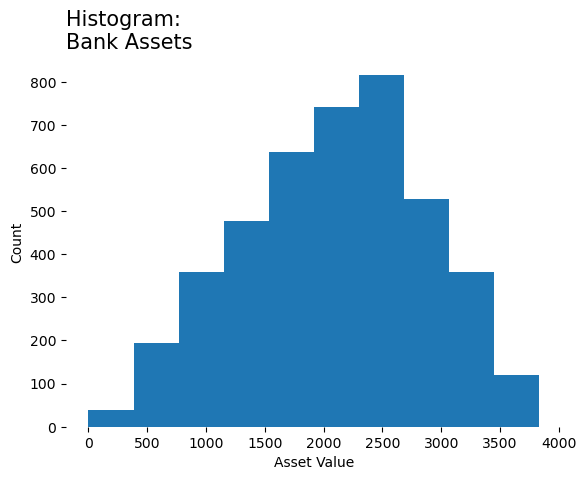

In [22]:
# Plot the histogram of bank assets to make sure the data appears normally distributed.
plt.hist(data['bank_asset_value'])
plt.title("Histogram: \nBank Assets", fontsize = 15, loc="left")
plt.xlabel("Asset Value")
plt.ylabel("Count")
plt.box(False)
plt.show()

In [23]:
# Get the mean of each column based on the approval status.
data.groupby('loan_status_Rejected').mean()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,self_employed_ Yes
loan_status_Rejected,,,,,,,,,,
0,2.474774,5.025904e+06,1.524725e+07,10.397590,703.461973,2437.821778,1983.607230,1.501660e+07,2080.912834,0.503765
1,2.538128,5.113825e+06,1.494606e+07,11.728456,429.468072,2479.175591,1964.551495,1.530694e+07,2099.671670,0.503410


In [24]:
# Seperate the approval and denied loans into two different data sets.
denied = data[data.loan_status_Rejected == 1]
approved = data[data.loan_status_Rejected == 0]

In [25]:
# Set a seed so the results can be duplicated
np.random.seed(6)

# Set the sample size for laon approvals to match the number of denials. 
approval_sample = approved.sample(n=1613)

# Make a new data set with the subset of data.
new_data = pd.concat([approval_sample, denied], axis = 0)

In [26]:
# Obtain the mean for the data that was rebalance between the approvals and rejections.

new_data.groupby('loan_status_Rejected').mean()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,self_employed_ Yes
loan_status_Rejected,,,,,,,,,,
0,2.472412,5.023435e+06,1.524668e+07,10.433974,700.551767,2426.523152,1976.787199,1.505077e+07,2076.978437,0.512709
1,2.538128,5.113825e+06,1.494606e+07,11.728456,429.468072,2479.175591,1964.551495,1.530694e+07,2099.671670,0.503410


In [27]:
# Check for Multi-colinearity.
# Make a correlation matrix with the dataframe.
matrix = new_data.corr().abs()
# Save only the values above the diagonal to a variable.
upper = matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(np.bool_))
# Loop through the columns to remove columns with coorelations above 0.9.
toRemove = [column for column in upper.columns if any (upper[column]> 0.9)]
# Print out the columns to remove.
print(toRemove)

['loan_amount', 'luxury_assets_value']


In [28]:
# Recheck for missing values
new_data.isna().sum().sum()

23

In [29]:
# Print out the rows with missing values
missing_values = new_data[new_data.isnull().any(axis=1)]
missing_values

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,self_employed_ Yes,loan_status_Rejected
904,2,4100000,14900000,12,571,NaN,2280.350850,13000000,1843.908891,0,0
3962,3,500000,1900000,18,618,NaN,774.596669,1000000,632.455532,1,0
784,0,5000000,14400000,2,761,NaN,2701.851217,12600000,2121.320344,0,0
59,4,5500000,18200000,16,797,NaN,2213.594362,18600000,2190.890230,1,0
702,4,6300000,23900000,6,899,NaN,3376.388603,20600000,2588.435821,1,0
3730,5,200000,700000,18,707,NaN,316.227766,500000,447.213595,0,0
4130,0,6200000,14900000,8,855,NaN,2683.281573,14200000,2863.564213,1,0
4206,0,2100000,8300000,20,765,NaN,1897.366596,7700000,1449.137675,1,0
1806,1,6200000,16200000,4,888,NaN,3464.101615,24300000,2000.000000,1,0
2707,2,7800000,29600000,14,568,NaN,2932.575660,27000000,2683.281573,1,0


In [30]:
# these values were most likely 0. I've made them 0 again.
new_data = new_data.fillna(0)

# Modeling without feature reduction.

## Logistic Regression

In [31]:
# Set the logistic regression function to a variable.
logr = LogisticRegression()
# set a standard scaler.
scaler = StandardScaler()

In [32]:
# Set the target column.
target = 'loan_status_Rejected'
# Seperate feature columns from the target columns.
features = new_data.drop(target, axis=1)
# Fit and transform the features to the model.
features = scaler.fit_transform(features)
# Split the data into training and testing variables.
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    new_data[target], 
                                                    test_size=0.2, 
                                                    random_state = 32)

In [33]:
# Run the logistic regression model on the training data.
logr.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Obtain the predictions from the test data.
prediction = logr.predict(X_test)

In [35]:
# Test Accuracy.
X_train_pred = logr.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, y_train)*100
accuracy = accuracy_score(y_test, prediction)*100
print('The accuracy on training data:', training_accuracy, '%')
print('The accuracy on testing data:', accuracy, '%')

The accuracy on training data: 92.55813953488372 %
The accuracy on testing data: 91.95046439628483 %


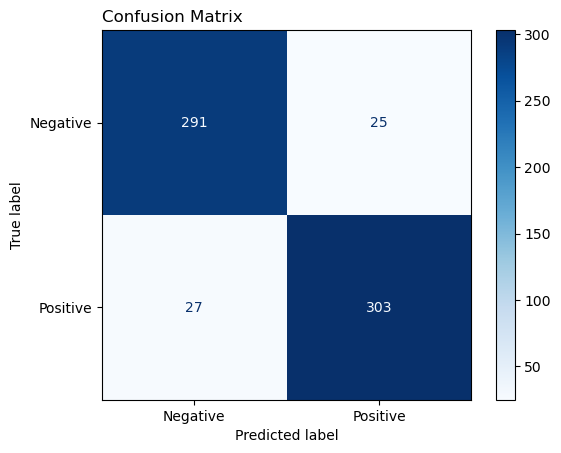

In [36]:
# Create a confusion matrix of the model.
confusion_matrix = metrics.confusion_matrix(y_test, prediction)
# Set up the confusion matrix using Sklearn confusion matrix display.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative','Positive'])
# Plot can be used to set up the matrix.
cm_display.plot(cmap='Blues')
# Changes the outside of the matrix can be done through pyplot.
plt.title('Confusion Matrix', loc="left")
plt.show()

In [37]:
# obtain the classification report of the data.
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       316
           1       0.92      0.92      0.92       330

    accuracy                           0.92       646
   macro avg       0.92      0.92      0.92       646
weighted avg       0.92      0.92      0.92       646



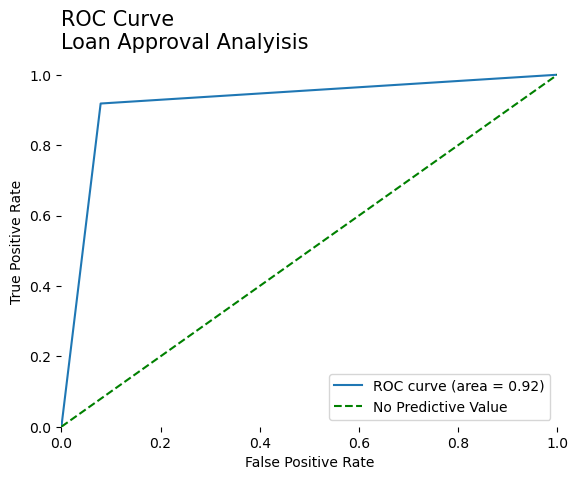

In [38]:
# Obtain the ROC curve of the data.
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# Calculate the Area under curve(AUC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'g--', label='No Predictive Value')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve \nLoan Approval Analyisis', fontsize=15, loc="left")
plt.legend()
plt.box(False)
plt.show()

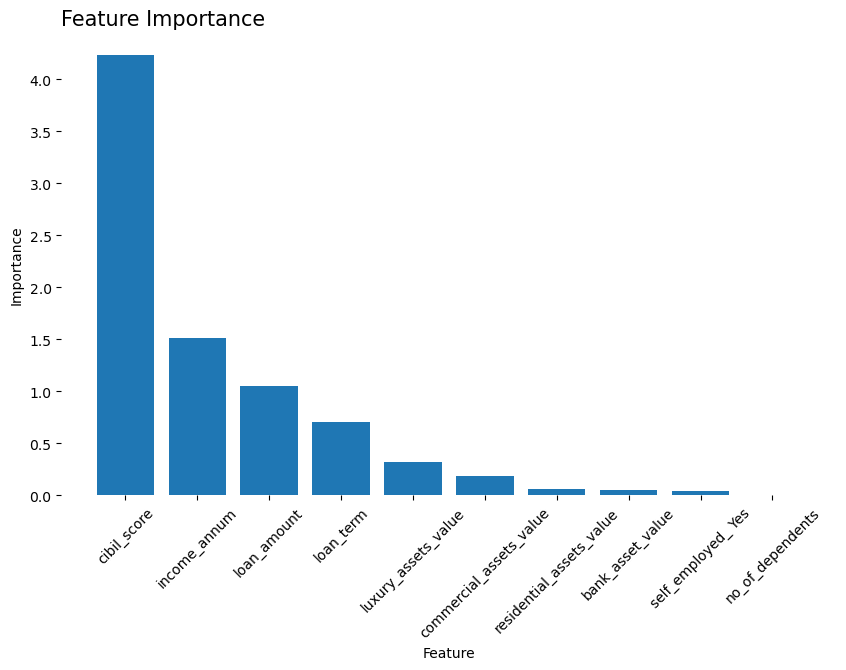

In [39]:
# Make a new data frame for the features.
featureData = new_data.drop('loan_status_Rejected', axis=1)
# Obtain the column naes from the data frame.
names = featureData.columns

# Calculate the feature importance.
importance = abs(logr.coef_[0])
# Build the feature's importance data frame.
data_list = list(zip(names, importance))

new_df = pd.DataFrame(data_list, columns =['Feature', 'Importance']).sort_values(by= "Importance", ascending = False)
# Plot the features importance.
plt.figure(figsize=(10, 6))
plt.bar(new_df["Feature"], new_df["Importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance", fontsize =15, loc="left")
plt.xticks(rotation=45)
plt.box(False)
plt.show()

## Random Forest

In [40]:
# Assign the random forrest function to a variable.
randomforest = RandomForestClassifier(random_state=20, n_jobs=-1)
# Make the model with the training data.
randomforest.fit(X_train, y_train)
# Get predictions.
prediction = randomforest.predict(X_test)

In [41]:
# Check accuracy.
accuracy = accuracy_score(y_test, prediction)*100
print('The accuracy is:', accuracy, '%')

The accuracy is: 98.14241486068111 %


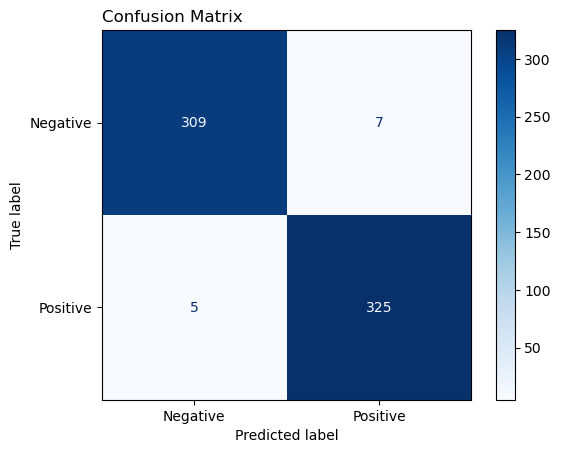

In [42]:
# Build a confusion matrix of the model.
confusion_matrix = metrics.confusion_matrix(y_test, prediction)
# Set up the confusion matrix using Sklearn confusion matrix display.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
display_labels = ['Negative','Positive'])
# Plot can be used to set up the matrix.
cm_display.plot(cmap='Blues')
# Changes f the outside of the matrix can be done through pyplot.
plt.title('Confusion Matrix', loc = "left")
plt.show()

In [43]:
# Get the classification report of the model. 
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       316
           1       0.98      0.98      0.98       330

    accuracy                           0.98       646
   macro avg       0.98      0.98      0.98       646
weighted avg       0.98      0.98      0.98       646



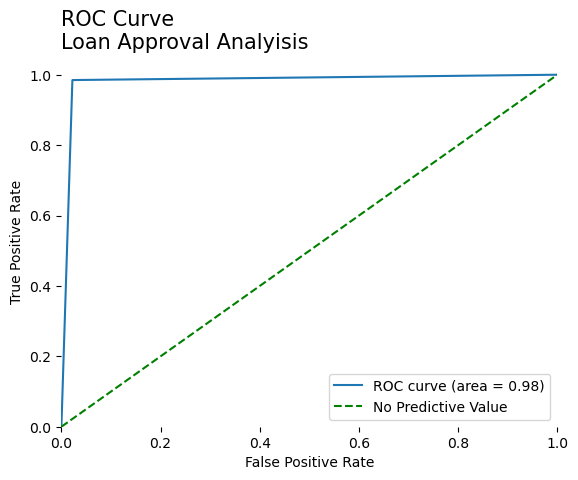

In [44]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# Calculate the Area under curve(AUC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'g--', label='No Predictive Value')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve \nLoan Approval Analyisis', fontsize = 15, loc = "left")
plt.legend()
plt.box(False)
plt.show()

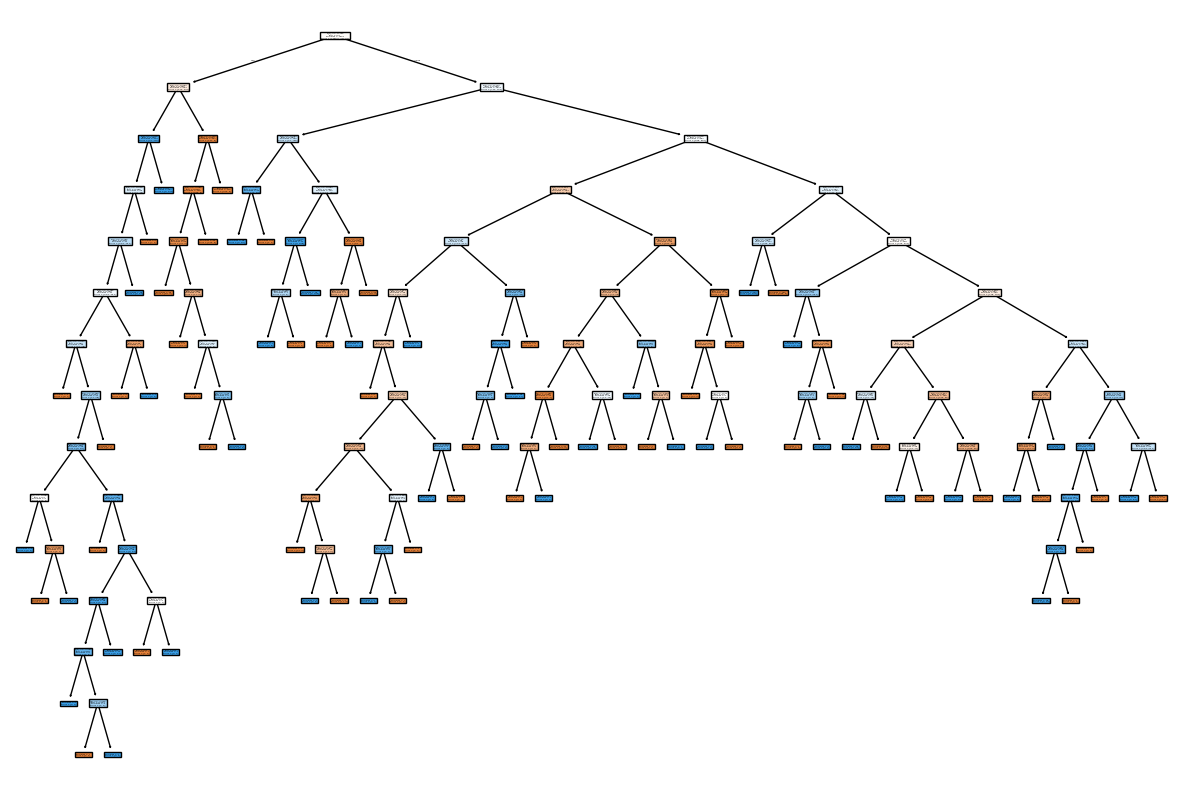

In [45]:
# Plot the random forest model.
plt.figure(figsize = (15, 10))
tree.plot_tree(randomforest[5], filled = True)
plt.show()

# Run the models again with reduced features

## Remove family size and self employment status

In [46]:
data.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,self_employed_ Yes,loan_status_Rejected
0,2,9600000,29900000,12,778,1549.193338,4195.235393,22700000,2828.427125,0,0
1,0,4100000,12200000,8,417,1643.167673,1483.239697,8800000,1816.590212,1,1
2,3,9100000,29700000,20,506,2664.582519,2121.320344,33300000,3577.708764,0,1
3,3,8200000,30700000,8,467,4266.145802,1816.590212,23300000,2810.693865,0,1
4,5,9800000,24200000,20,382,3521.363372,2863.564213,29400000,2236.067977,1,1


In [47]:
# Drop the columns that we want to remove. 
data=data.drop(columns = ['no_of_dependents', 'self_employed_ Yes', 'loan_amount', 'luxury_assets_value'])


In [48]:
# Group the data by the approval status and check the columsn for their mean values.
data.groupby('loan_status_Rejected').mean()

,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value
loan_status_Rejected,,,,,,
0,5.025904e+06,10.397590,703.461973,2437.821778,1983.607230,2080.912834
1,5.113825e+06,11.728456,429.468072,2479.175591,1964.551495,2099.671670


In [49]:
# Split the data into new data sets for approval and rejections.
denied = data[data.loan_status_Rejected == 1]
approved = data[data.loan_status_Rejected == 0]

In [50]:
# Set a seed so the results can be reproduced.
np.random.seed(6)

# Obtain a subset of approved loans equal to the denials. 
approval_sample = approved.sample(n=1613)

# Combine the two datasets together.
new_data = pd.concat([approval_sample, denied], axis = 0)

In [51]:
# Check the mean of the new rebalanced data set.
new_data.groupby('loan_status_Rejected').mean()

,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value
loan_status_Rejected,,,,,,
0,5.023435e+06,10.433974,700.551767,2426.523152,1976.787199,2076.978437
1,5.113825e+06,11.728456,429.468072,2479.175591,1964.551495,2099.671670


In [52]:
# Fill the missing values with 0 again.
new_data = new_data.fillna(0)

## LogReg

In [53]:
# Set the logistic regression function to a vaiable and apply a standard scaler.
logr = LogisticRegression()
scaler = StandardScaler()

In [54]:
# Set the target column name to a variable.
target = 'loan_status_Rejected'
# Split the feture columns from the target column.
features = new_data.drop(target, axis=1)
# Fit the feature columns to the model.
features = scaler.fit_transform(features)
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    new_data[target], 
                                                    test_size=0.2, 
                                                    random_state = 32)

In [55]:
# Fit the training data to the model.
logr.fit(X_train, y_train)

LogisticRegression()

In [56]:
# Obtain the predictions from the test data on the model.
prediction = logr.predict(X_test)

In [57]:
# Test accuracy.
X_train_pred = logr.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, y_train)*100
accuracy = accuracy_score(y_test, prediction)*100
print('The accuracy on training data:', training_accuracy, '%')
print('The accuracy on testing data:', accuracy, '%')

The accuracy on training data: 92.28682170542636 %
The accuracy on testing data: 92.26006191950464 %


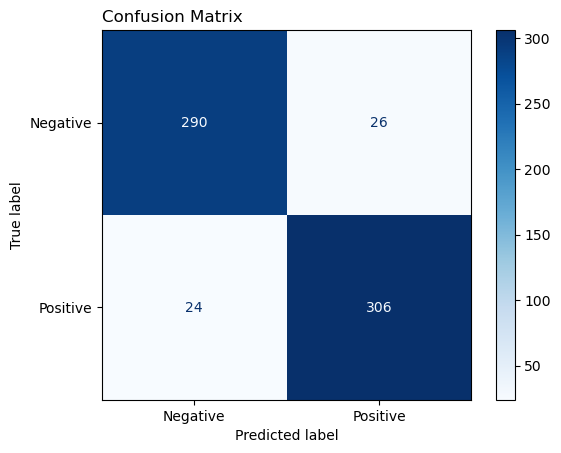

In [58]:
# Create a confuion matrix of the model.
confusion_matrix = metrics.confusion_matrix(y_test, prediction)
# Set up the confusion matrix using Sklearn confusion matrix display.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative','Positive'])
# Plot can be used to set up the matrix.
cm_display.plot(cmap='Blues')
# Changes the outside of the matrix can be done through pyplot.
plt.title('Confusion Matrix', loc="left")
plt.show()

In [59]:
# Print the classification report of the model.
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       316
           1       0.92      0.93      0.92       330

    accuracy                           0.92       646
   macro avg       0.92      0.92      0.92       646
weighted avg       0.92      0.92      0.92       646



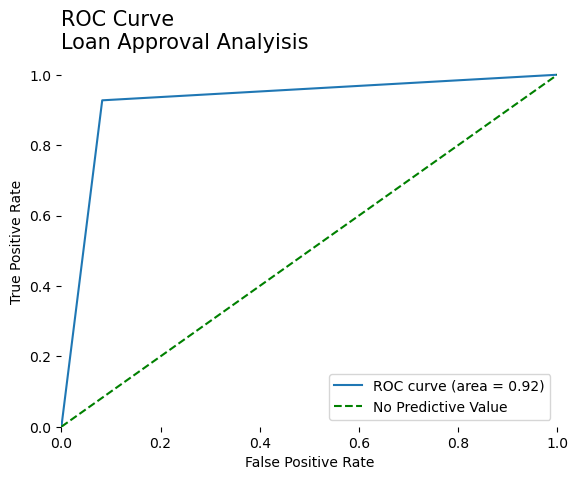

In [60]:
# Obtain the ROC curve of the model.
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# Calculate the Area under curve(AUC).
roc_auc = auc(fpr, tpr)
# Plot the ROC curve.
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'g--', label='No Predictive Value')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve \nLoan Approval Analyisis', fontsize=15, loc="left")
plt.legend()
plt.box(False)
plt.show()

## Random Forest

In [61]:
# Assign the random forrest function to a variable.
randomforest = RandomForestClassifier(random_state=20, n_jobs=-1)
# Make the model with the training data.
randomforest.fit(X_train, y_train)
# Get predictions.
prediction = randomforest.predict(X_test)

In [62]:
# Get predictions.
prediction = randomforest.predict(X_test)

In [63]:
# Check accuracy.
accuracy = accuracy_score(y_test, prediction)*100
print('The accuracy is:', accuracy, '%')

The accuracy is: 96.43962848297214 %


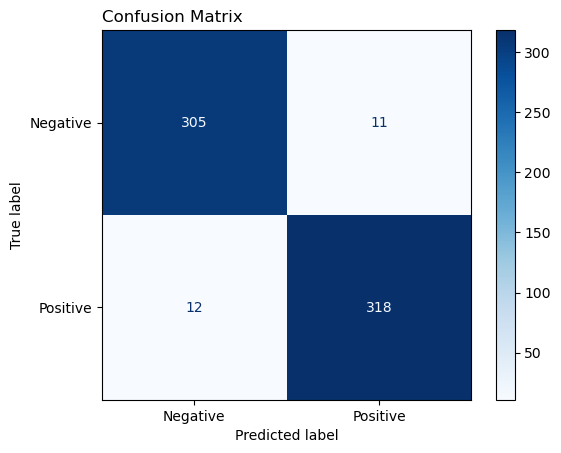

In [64]:
# Make a confusion matrix of the model.
confusion_matrix = metrics.confusion_matrix(y_test, prediction)
# Set up the confusion matrix using Sklearn confusion matrix display.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
display_labels = ['Negative','Positive'])
# Plot can be used to set up the matrix.
cm_display.plot(cmap='Blues')
# Changes f the outside of the matrix can be done through pyplot.
plt.title('Confusion Matrix', loc = "left")
plt.show()

In [65]:
# Print the classification report of the model.
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       316
           1       0.97      0.96      0.97       330

    accuracy                           0.96       646
   macro avg       0.96      0.96      0.96       646
weighted avg       0.96      0.96      0.96       646



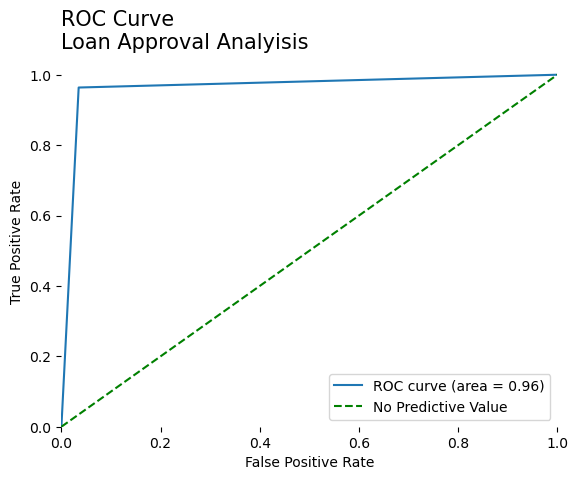

In [66]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# Calculate the Area under curve(AUC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'g--', label='No Predictive Value')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve \nLoan Approval Analyisis', fontsize = 15, loc = "left")
plt.legend()
plt.box(False)
plt.show()

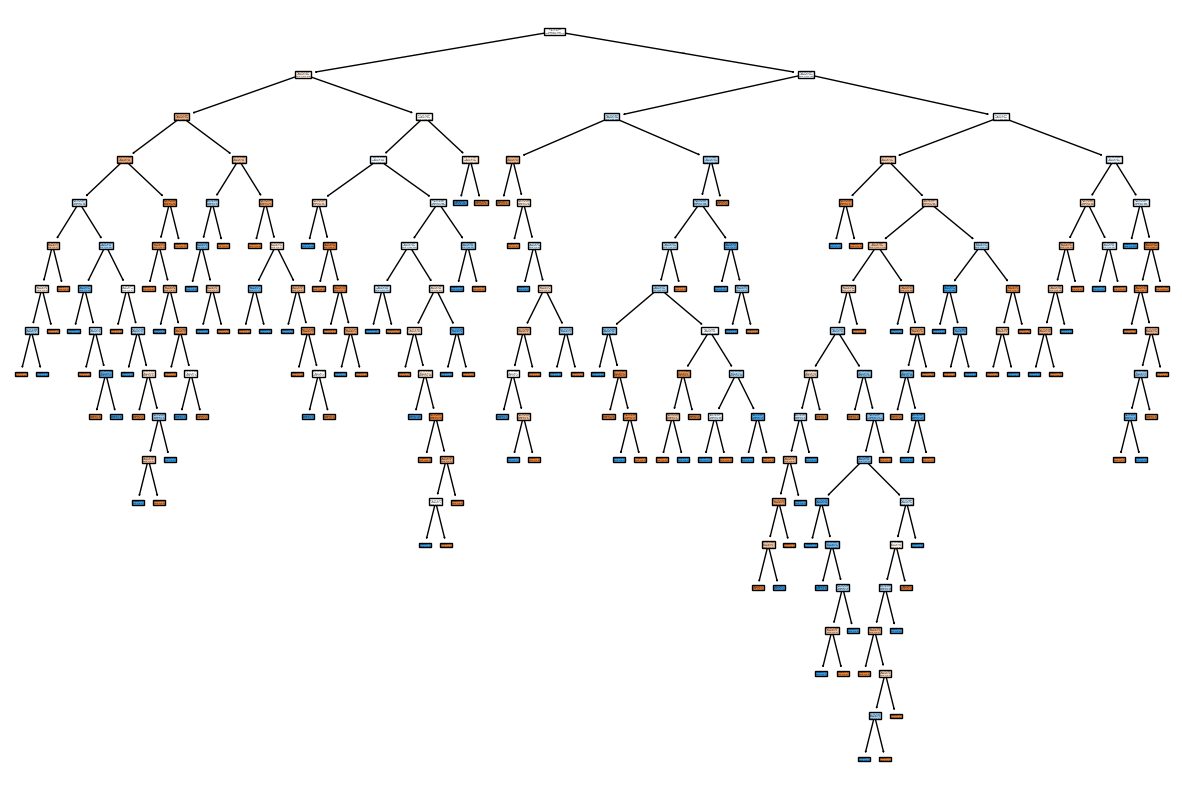

In [67]:
# Plot the Random Forest model. 
plt.figure(figsize = (15, 10))
tree.plot_tree(randomforest[5], filled = True)
plt.show()